<a href="https://colab.research.google.com/github/mrafiuddin50/full_stack_deep_learning/blob/main/deep_learning_fundamentals_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - Part 1

## Colab environment

In [1]:
!python --version

Python 3.6.9


In [2]:
!pip list | grep tensor

tensorboard                   2.4.1          
tensorboard-plugin-wit        1.8.0          
tensorboardcolab              0.0.22         
tensorflow                    2.4.1          
tensorflow-addons             0.8.3          
tensorflow-datasets           4.0.1          
tensorflow-estimator          2.4.0          
tensorflow-gcs-config         2.4.0          
tensorflow-hub                0.11.0         
tensorflow-metadata           0.27.0         
tensorflow-privacy            0.2.2          
tensorflow-probability        0.12.1         


In [3]:
!pip list | grep torch

torch                         1.7.0+cu101    
torchsummary                  1.5.1          
torchtext                     0.3.1          
torchvision                   0.8.1+cu101    


In [4]:
!nvidia-smi

# It's okay to run this notebook without a GPU!

Tue Feb  9 13:44:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Basic numerical computing

In [5]:
import numpy as np

# Initialize a numpy ndarray with 3 rows, 2 columns
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [7]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [8]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [9]:
# We can set values of a whole column
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [10]:
X = np.array([
  [1, 2],
  [3, 4],
  [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [11]:
x = np.array([10, 20])
print(x)
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x

[10 20]
(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [12]:
X.shape, x.shape

((3, 2), (2,))

In [13]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [14]:
# Matrix multiplication
# http://matrixmultiplication.xyz/

x = np.array([[10, 20],]).T
result = X @ x  # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

### Indexing

In [15]:
X = np.random.rand(3, 2)
X

array([[0.90239165, 0.196658  ],
       [0.45978579, 0.91661743],
       [0.19746701, 0.66373707]])

In [16]:
X > 0.5

array([[ True, False],
       [False,  True],
       [False,  True]])

In [17]:
X[X > 0.5] = 1
X

array([[1.        , 0.196658  ],
       [0.45978579, 1.        ],
       [0.19746701, 1.        ]])

## Basic plotting

In [18]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

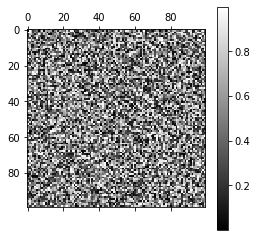

In [19]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

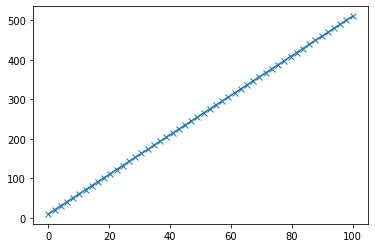

In [20]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x * w + b

plt.plot(x, y, 'x-')

## Basic regression with a linear model

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


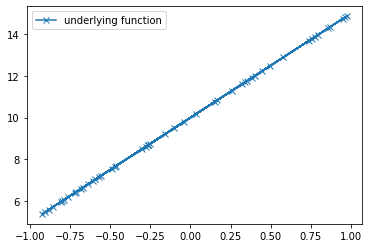

In [21]:
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

### Basic prediction function: Linear

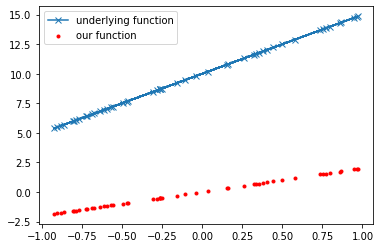

In [22]:
# Let's initialize our predictions

class Linear:
  def __init__(self, input_dim, num_hidden=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(1)
  
  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

### Basic loss function: MSE


In [23]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 98.29054256242884


### Add back propagation

In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros((1))
    # bound = np.sqrt(6 / (input_dim + num_hidden))
    # self.weights = np.random.uniform(-bound, bound, size=(input_dim, num_hidden))
    # self.bias = np.random.uniform(-bound, bound, size=(1,))
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    # print('Linear forward', x.shape, self.weights.shape, output.shape)
    return output

  # y = w*x + b
  # dy/dx = w
  # dy/dw = x
  # dy/db = 1

  def backward(self, gradient):
    # print('Linear backward', gradient.shape, self.x.shape, self.weights.shape, self.bias.shape)
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum()
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

109.20564191667856
71.55184195631459


### Train using gradient descent!

Epoch 0, loss 103.73566716449388
Epoch 5, loss 12.135793405076738
Epoch 10, loss 1.8466252464519044
Epoch 15, loss 0.49255061426443747
Epoch 20, loss 0.21198830470708227
Epoch 25, loss 0.10875933159687426
Epoch 30, loss 0.05815871887461171
Epoch 35, loss 0.03136693993412251


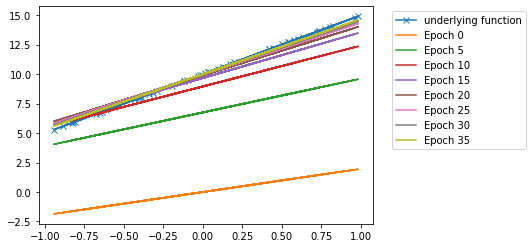

In [ ]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

### 2-dimensional inputs work, too

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


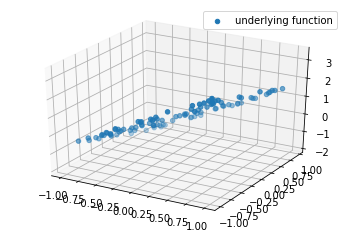

In [ ]:
# What about 2-dimensional x?

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

0.7269850767710956


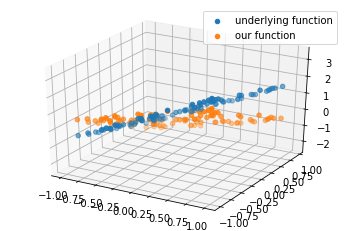

In [ ]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 0.7269850767710956
Epoch 1, loss 0.5846198368649492
Epoch 2, loss 0.47587066986999643
Epoch 3, loss 0.3912319684009264
Epoch 4, loss 0.32424160099668353
Epoch 5, loss 0.27043911197804915
Epoch 6, loss 0.22669180354442603
Epoch 7, loss 0.1907570294717816
Epoch 8, loss 0.16099642424107824
Epoch 9, loss 0.1361880863413875
Epoch 10, loss 0.11540210520047811
Epoch 11, loss 0.09791721198932901
Epoch 12, loss 0.08316426483838858
Epoch 13, loss 0.07068735817694653
Epoch 14, loss 0.060116602122355554
Epoch 15, loss 0.051148708026719884
Epoch 16, loss 0.04353286023343261
Epoch 17, loss 0.037060220129957536
Epoch 18, loss 0.03155596826390865
Epoch 19, loss 0.026873153346855572


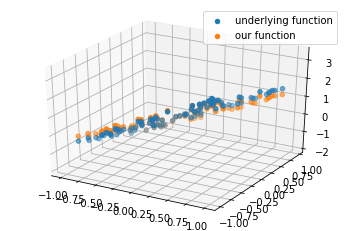

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data.

How can this be made to work for non-linear data?

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


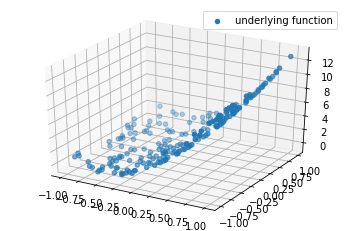

In [ ]:
# Make non-linear data

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 27.405106326622263
Epoch 1, loss 21.614150214944413
Epoch 2, loss 17.47230960959689
Epoch 3, loss 14.444514431257652
Epoch 4, loss 12.18065543579617
Epoch 5, loss 10.449917259887409
Epoch 6, loss 9.098673136949396
Epoch 7, loss 8.023452638546475
Epoch 8, loss 7.153556809670337
Epoch 9, loss 6.439852174158179
Epoch 10, loss 5.847525668283952
Epoch 11, loss 5.351381753942294
Epoch 12, loss 4.9327737605369215
Epoch 13, loss 4.5775880347728055
Epoch 14, loss 4.274908263664682
Epoch 15, loss 4.016120878830987
Epoch 16, loss 3.79430790328482
Epoch 17, loss 3.6038283148690278
Epoch 18, loss 3.4400240590147724
Epoch 19, loss 3.2990093317703395
Epoch 20, loss 3.1775161995353516
Epoch 21, loss 3.072778918622307
Epoch 22, loss 2.9824453158768103
Epoch 23, loss 2.9045074743718016
Epoch 24, loss 2.837246492649168
Epoch 25, loss 2.7791877366636424
Epoch 26, loss 2.729064090859347
Epoch 27, loss 2.685785437666597
Epoch 28, loss 2.648413080881629
Epoch 29, loss 2.6161381600187035
Epoch 3

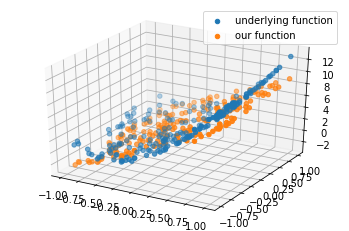

In [ ]:
# We can train just fine, but the final loss will remain high, as our linear function is incapable
# of representing the data.

loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

### Add non-linearity: ReLU

In [ ]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train our new non-linear model

27.86259518856504


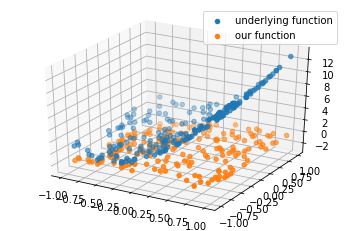

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [ ]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

30.386099010458615
18.555641728042975


Epoch 0, loss 18.555641728042975
Epoch 1, loss 15.198300704136056
Epoch 2, loss 9.621170191765277
Epoch 3, loss 3.7429378345825137
Epoch 4, loss 1.9351769814700321
Epoch 5, loss 1.4187988834167606
Epoch 6, loss 1.220268711383434
Epoch 7, loss 1.0917364067255744
Epoch 8, loss 0.9731045205994784
Epoch 9, loss 0.8759954447691345
Epoch 10, loss 0.796362046589269
Epoch 11, loss 0.7279192404857261
Epoch 12, loss 0.6704744731203109
Epoch 13, loss 0.6214298127820135
Epoch 14, loss 0.5783845654474091
Epoch 15, loss 0.5421872717006704
Epoch 16, loss 0.5096027679929956
Epoch 17, loss 0.48208338308601034
Epoch 18, loss 0.45808274442463603
Epoch 19, loss 0.43736206140760286
Epoch 20, loss 0.4190209200102178
Epoch 21, loss 0.402758417068275
Epoch 22, loss 0.38775875481324706
Epoch 23, loss 0.3735574624090938
Epoch 24, loss 0.3607947975434502
Epoch 25, loss 0.3491158876526177
Epoch 26, loss 0.33812717526916797
Epoch 27, loss 0.3278454448650275
Epoch 28, loss 0.31781858968688886
Epoch 29, loss 0.30808

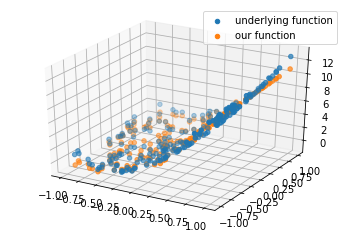

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=30)
plot_3d(x, y_true, model(x))

### Same thing, in PyTorch

tensor(24.4217, grad_fn=<MseLossBackward>)


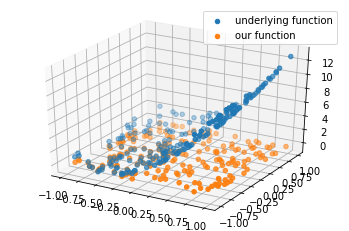

In [ ]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
plot_3d(x_tensor, y_true_tensor, model(x_tensor).detach())

In [ ]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(24.4217, grad_fn=<MseLossBackward>)
tensor(17.2817, grad_fn=<MseLossBackward>)


tensor(17.2817, grad_fn=<MseLossBackward>)
tensor(12.5468, grad_fn=<MseLossBackward>)
tensor(8.2289, grad_fn=<MseLossBackward>)
tensor(5.3096, grad_fn=<MseLossBackward>)
tensor(3.6553, grad_fn=<MseLossBackward>)
tensor(2.6217, grad_fn=<MseLossBackward>)
tensor(1.9070, grad_fn=<MseLossBackward>)
tensor(1.4511, grad_fn=<MseLossBackward>)
tensor(1.1456, grad_fn=<MseLossBackward>)
tensor(0.9322, grad_fn=<MseLossBackward>)
tensor(0.7815, grad_fn=<MseLossBackward>)
tensor(0.6711, grad_fn=<MseLossBackward>)
tensor(0.5906, grad_fn=<MseLossBackward>)
tensor(0.5298, grad_fn=<MseLossBackward>)
tensor(0.4835, grad_fn=<MseLossBackward>)
tensor(0.4482, grad_fn=<MseLossBackward>)
tensor(0.4201, grad_fn=<MseLossBackward>)
tensor(0.3972, grad_fn=<MseLossBackward>)
tensor(0.3778, grad_fn=<MseLossBackward>)
tensor(0.3615, grad_fn=<MseLossBackward>)
tensor(0.3475, grad_fn=<MseLossBackward>)
tensor(0.3353, grad_fn=<MseLossBackward>)
tensor(0.3245, grad_fn=<MseLossBackward>)
tensor(0.3148, grad_fn=<MseLossB

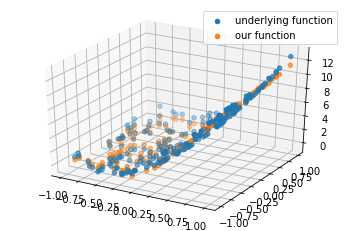

In [ ]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=30)
plot_3d(x, y_true, model(x_tensor).detach())

### Same thing, in Tensorflow/Keras

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
regression (Dense)           (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 18.6877
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.3538
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4133
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4931
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3267
Epoc

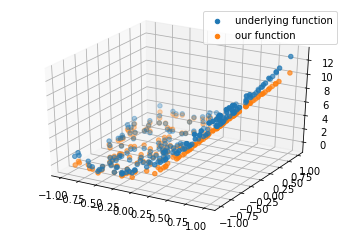

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))

## Next time

We will work on a classification task.